<a href="https://colab.research.google.com/github/singhr08-cpu/Test/blob/main/BlueSky_Booking_Systems_solution_Q1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BlueSky Airlines Booking Systems

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Known data for the problem
Capacity = 200           # plane capacity (# of seats)
Booking_Limit_SS = 120   # booking limit for SS class

Price_FF = 850   # price for SS (Super Saver)
Price_SS = 350   # price for FF (Full Fare)

In [4]:
# read the data from an Excel file
df = pd.read_csv("BlueSky_Demand_Data.csv", index_col = 0)
display(df)

,Demand_SS,Demand_FF
0,170,63
1,137,45
2,188,83
3,123,21
4,21,38
...,...,...
995,185,71
996,133,53
997,123,60
998,103,82


# Q1
## Calculate the mean and standard deviation of demands

In [5]:
# set up the demands equal to the mean of the distribution
mean_SS = np.mean(df["Demand_SS"])
mean_FF = np.mean(df["Demand_FF"])

# set up the demands equal to the mean of the distribution
std_SS = np.std(df["Demand_SS"])
std_FF = np.std(df["Demand_FF"])

# print the results
print(f"The mean SS demand is {mean_SS:.2f} and stdev for SS demand {std_SS:,.2f}")
print(f"The mean FF demand is {mean_FF:.2f} and stdev for FF demand {std_FF:,.2f}")

The mean SS demand is 129.55 and stdev for SS demand 44.67
The mean FF demand is 55.43 and stdev for FF demand 19.94


## Scatter plot of demands

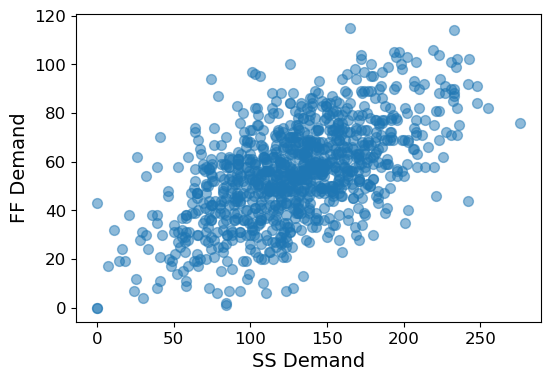

In [ ]:
# Scatter plot of price and demand
plt.figure(figsize=(6,4))
plt.scatter(x=df["Demand_SS"], y=df["Demand_FF"], marker='.', s=200, alpha=0.5)
plt.xlabel("SS Demand", fontsize=14)
plt.ylabel("FF Demand", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Clearly, the demands are positively correlated. We can even calculate the correlation coefficient:

In [ ]:
# calculate and print the correlation coefficient
print(f'The correlation coefficient: {df["Demand_FF"].corr(df["Demand_SS"]):.2f}')

The correlation coefficient: 0.57


# Q2

We define a function to calculate the revenue below. There are a few steps:
 1. We first calculate the sales (i.e., the number of bookings) for each fare class. The bookings for SS cannot exceed the **booking limit for SS**, so the expression for these is:<br>
  $\mbox{Sales SS} = \min(\mbox{Demand SS}, \mbox{Booking Limit SS})$
 2. In view of this, the number of seats that remain available for FF is exactly:<br>
  $\mbox{Remaining seats for FF} = \mbox{Plane Capacity} - \mbox{Sales SS}$
 3. Lastly, the bookings for FF cannot exceed the **remaining seats available for SS**, so the expression for these is:<br>
  $\mbox{Sales FF} = \min(\mbox{Demand FF}, \mbox{Remaining seats for FF})$

For our subsequent purposes, it is very helpful to define the function in as flexible of a manner as possible. In this sense, it is best to allow our function to take as arguments not just the two demand values, but also the other problem parameters (`Capacity`, `BookingLimit`, etc.) That is why below, we define a function with the following syntax:

 > `calculate_revenue(Demand_SS, Demand_FF, Capacity=200, Price_SS=350, Price_FF=850, Booking_Limit_SS=120)`

where:
 - `Demand_SS` is the value of SS demand.
 - `Demand_FF` is the value of FF demand.
 - `Capacity` is the plane capacity; the syntax `Capacity=200` means that the default value of this argument is 200.<br>
   _This means that we can omit the argument when calling the function, and if we omit it, it will take value 200 inside the function._
 - `Price_SS`, `Price_FF` are the SS and FF fares, respectively; by default, 350 and 850, respectively.
 - `Booking_Limit_SS` is the booking limit for SS fares; by default, 120.

The function returns the revenue calculated under the corresponding parameters.

In [6]:
### A function that calculates revenue for a given full set of problem parameters
def calculate_revenue(Demand_SS, Demand_FF, Capacity=200, Price_SS=350, Price_FF=850, \
                      Booking_Limit_SS=120):
    # calculate the bookings (sales) in each category
    Sales_SS = min(Demand_SS, Booking_Limit_SS)        # this formula assumes that Booking_Limit_SS <= Capacity, which should be the case for any sensible booking limit !
    Sales_FF = min(Demand_FF, Capacity - Sales_SS)

    # calculate the revenue
    Revenues_SS = Sales_SS * Price_SS
    Revenues_FF = Sales_FF * Price_FF
    Revenue = Revenues_SS + Revenues_FF

    # return the revenue
    return Revenue

**Note that when calling the function above, we do not need to pass arguments that are set by _default_ such as `Capacity`, `Price_SS`, `Price_FF` or `BookingLimit`. If we omit such an argument, it will take the value specified in the definition of the function (e.g., the `Capacity` would be 200).**

Now let's evaluate the function when demands are equal to their means.

In [10]:
## Let's set the demands equal to their means
revenue_Q2 = calculate_revenue(Demand_SS = np.mean(df["Demand_SS"]), Demand_FF = np.mean(df["Demand_FF"]))

## Print the results
print(f"The revenue when demands equal their means is ${revenue_Q2:,.2f}.")

The revenue when demands equal their means is $89,116.35.


Note how when calling the function, we only specify two arguments, for the demands. That is because all the other arguments can stay at their default values.

# Q3

Now we use the model from **Q2** to calculate the revenue for every historical sample of data.

We use a for loop to go through the data and we show two ways to store the results: (i) in a numpy array and (i) in the dataframe itself (as another column).

In [11]:
## Initialize a numpy array of zeros where we will store the revenue calculation
# the length is the number of rows in the dataframe
revenue_values = np.zeros(len(df))

Next, we loop through the rows of the dataframe and calculate the revenue in each sample. We choose to loop with the index (which, conveniently, is 0, 1, ...)

In [23]:
## loop through every sample of data
for sample in df.index:

    ## calculate the revenue in that sample
    revenue_val = calculate_revenue(Demand_SS = df.loc[sample, "Demand_SS"], Demand_FF = df.loc[sample, "Demand_FF"])

    ## store the revenue in the numpy array
    # Note that we can use 'sample' here because it takes values 0, 1, ... (exactly as the numeric index that we need to index in the array!)
    revenue_values[sample] = revenue_val

    ## we also store this in the dataframe itself - makes for nicer printing and plotting...
    df.loc[sample, "Revenue"] = revenue_val

Lastly, let's calculate and print the **mean revenue**.

In [ ]:
print(f"The mean revenue estimated from the samples is: {np.mean(revenue_values):,.2f}.")

The mean revenue estimated from the samples is: 83,617.25.


You can also print a glimpse of the dataframe, which now includes the revenue calculations.

In [22]:
# print dataframe
df.head(10)

,Demand_SS,Demand_FF,Revenue
0,170,63,95550.0
1,137,45,80250.0
2,188,83,110000.0
3,123,21,59850.0
4,21,38,39650.0
5,160,79,109150.0
6,151,60,93000.0
7,100,26,57100.0
8,98,68,92100.0
9,72,33,53250.0


# Q4
The parameters from the case

In [26]:
## The data on demand distributions
mean_SS = 130
stdev_SS = 45
mean_FF = 55
stdev_FF = 20

We do a Monte-Carlo simulation where we generate the values of SS and FF demands, and then we calculate anything needed (e.g., revenue, number of SS customers turned away, etc.)

## Monte-Carlo simulation model

We can store the demand samples and the calculations in any data structure: in lists, in numpy arrays, as columns in a dataframe. Below, we store them as numpy arrays because these are faster to work with.

In [28]:
## set up the number of trials and the seed
num_trials = 10000

# set up a random number generator with seed 12345
rng = np.random.default_rng(seed=12345)

# set up a numpy array in which to store the values for the revenues (this could also be a regular python list)
revenue_values = np.zeros(num_trials)

# for Q4, we must also determine how many SS customers are turned away
SS_turned_away = np.zeros(num_trials)

### Run the simulation:
for t in range(num_trials):

    # generate values for the two demands
    Demand_SS = rng.normal(mean_SS, stdev_SS)
    Demand_FF = rng.normal(mean_FF, stdev_FF)

    # calculate the revenue using the function



    # NEW FOR Q3: calculate the number of SS customers turned away
    SSTurnedAway[t] = Demand_SS - Sales_SS

    # calculate the revenues
    Revenues_SS = Sales_SS * ItineraryData["SS"]["Fare"]
    Revenues_FF = Sales_FF * ItineraryData["FF"]["Fare"]
    Revenue = Revenues_SS + Revenues_FF

    # record the value for the revenue
    RevenueValues[t] = Revenue

NameError: name 'Sales_SS' is not defined

In [ ]:
**IMPORTANT NOTE**

In [ ]:
## generate the samples of SS demand and FF demand
# NOTE: we generate these in one shot with the commands below
# Alternatively, we could also generate these using a for loop
# IMPORTANT! The values generated with these two methods will NOT be the same, even if we use the same seed!
demand_SS_vals = rng.normal(mean_SS, stdev_SS, num_trials)
demand_FF_vals = rng.normal(mean_FF, stdev_FF, num_trials)



## Generate the histogram of the revenues

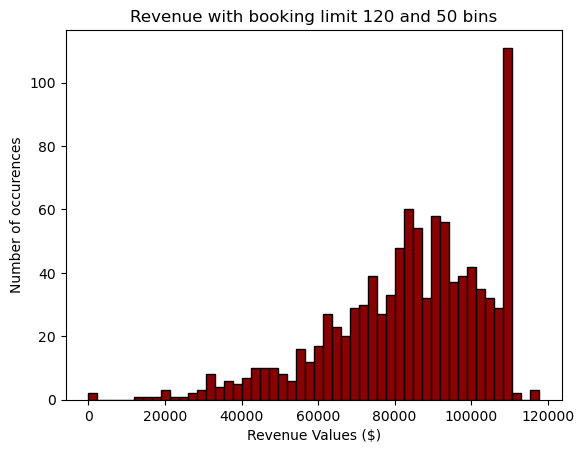

In [ ]:
nbins = 50
plt.hist(revenue_values, bins=nbins, color="darkred", edgecolor="black")
plt.xlabel("Revenue Values ($)")
plt.ylabel("Number of occurences")
plt.title(f"Revenue with booking limit {Booking_Limit_SS} and {nbins} bins")
plt.show()

## (i) Calculate Probability for Revenue

First, let's store the threshold value 100K in a variable

In [ ]:
rev_threshold = 100000

To calculate the probability that the revenue exceeds $100,000, we can loop through the numpy array `revenue_values` and use an **if** statement to determine the number of times this holds.

A more elegant way is to use a list comprehension. For instance, here we create a list that contains 1 when the condition holds and 0 otherwise.

In [ ]:
# a list with 1 or 0 depending on the condition
does_revenue_exceed_100K = [1 if rev > rev_threshold else 0 for rev in revenue_values]

Then, we can easily estimate the probability, as follows (note that we display it as a %)

In [ ]:
print(f"The estimated probability that revenue exceeds 100K is {100*sum(does_revenue_exceed_100K)/len(does_revenue_exceed_100K):.2f}%")

The estimated probability that revenue exceeds 100K is 23.40%


The most elegant way here is to use `numpy`'s ability to deal with logical conditions.

A condition like `x > 10` where `x` is a numpy array will return an array of `True/False` depending on whether the condition holds.

Moreover, you can take the `sum` of the resulting array and numpy will convenient treat the `True` as 1 and the `False` as 0. This gives a very concise syntax:

In [ ]:
# use numpy's functionality to directly estimate
probability = np.sum(revenue_values > rev_threshold)/len(revenue_values)

print(f"The estimated probability that revenue exceeds 100K is {100*probability:.2f}%")

The estimated probability that revenue exceeds 100K is 23.40%


You are of course **not** expected to remember such things. And in case you need to look for options, you always have chatbots available. For instance, for this example, try prompting a chatbot with something like:<br>
 > _What is the most efficient way to calculate the number of instances where a conditon holds if the condition depends on the values of a numpy array?_

## (ii) Probability of turning SS customers away

First, we must understand the event that is relevant here. "Turning customers away" means that the demand for SS fare is larger than the booking limit!

So we just need to count the number of instances where there is true. We show you two ways, using `pandas` itself and also using `numpy`.

First, let's use `pandas`. We can simply create another column in the dataframe that stores the samples when SS demand exceeded the booking limit.

In [ ]:
## calculate a new column in pandas
df["Are_SS_Customers_Turned_Away?"] = (df["Demand_SS"] > Booking_Limit_SS)

## Display a few samples to check
display(df.head(6))

## Calculate the probability
print(f'The estimated probability that SS customers are turned away is {100*np.sum(df["Are_SS_Customers_Turned_Away?"])/len(df):.2f}%')

,Demand_SS,Demand_FF,Revenue,Are_SS_Customers_Turned_Away?
0,170,63,95550.0,True
1,137,45,80250.0,True
2,188,83,110000.0,True
3,123,21,59850.0,True
4,21,38,39650.0,False
5,160,79,109150.0,True


The estimated probability that SS customers are turned away is 57.90%


We can of course also use numpy.

In [ ]:
## Get the SS demands in a numpy array
all_SS_demands = np.array(df["Demand_SS"])

## Calculate the probability
print(f'The estimated probability that SS customers are turned away is {100*np.sum(all_SS_demands > Booking_Limit_SS)/len(all_SS_demands):.2f}%')

The estimated probability that SS customers are turned away is 57.90%


# Q5
To calculate the optimal booking limit, we will test all the values of the booking limit from 0 to the airplane capacity and for every such value, we will calculate the **mean** revenue.

Recall that to calculate the mean revenue, we were looping through all the demand values and using our function to determine the revenue for a given demand.

Here, we would like to change **two** things:
 - we want an outer `for` loop that presumably would change the booking limit (which used to be stored in the `Booking_Limit_SS` variable)
 - we also want an inner `for` loop that (for a given booking limit) calculates the mean revenue by looping through the samples. Here, we could potentially use the function we wrote in **Q2**, which achieves this.

## Brute-Force Approach

We first show a very "brute-force" approach that uses the function that we wrote in **Q2** to implement this.

Set up the values to test for the booking limit: all the integers from 0 to Capacity.

In [ ]:
## values to test for the booking limit
booking_limit_values = np.arange(0,Capacity+1,1)

Set up a numpy array to store the value of the **mean revenue** for each booking limit

In [ ]:
## set up numpy array to store the values for mean revenue
mean_revenue_values = np.zeros(len(booking_limit_values))

Now, let's do the outer for loop and use the function from **Q3**. The critical thing to note is that our function from **Q2** only takes the demand values as arguments, and uses the global variable `Booking_Limit_SS` for the booking limit. In our calculation here, we also want to change the booking limit! So <font color=red>**to use the function in Q2, we are forced to change the global variable `Booking_Limit_SS`!**</font> Note that this is done in the code below!

In [ ]:
## Outer for loop that tests different values for the booking limit
for i in range(len(booking_limit_values)):

    ## Call the function that calculates the revenue values for all demand samples,
    # but with a different booking limit!

    ## calculate the revenue in that sample
    all_revenue_vals = calculate_revenues(Demand_SS = df.loc[sample, "Demand_SS"], Demand_FF = df.loc[sample, "Demand_FF"])

        ## store the revenue in the numpy array
        # Note that we can use 'sample' here because it takes values 0, 1, ... (exactly as the numeric index that we need to index in the array!)
        revenue_values[sample] = revenue_val

        ## we also store this in the dataframe itself - makes for nicer printing and plotting...
        df.loc[sample, "Revenue"] = revenue_val

    ## Calculate and store the mean revenue in the numpy array
    mean_revenue_values[i] = np.mean(revenue_values)

## Finally, we can calculate the optimal (i.e., maximum) mean revenue and the optimal booking limit value (that maximizes the mean revenue)
optimal_revenue = np.max(mean_revenue_values)
optimal_booking_limit = booking_limit_values[np.argmax(mean_revenue_values)]

print(f"The optimal revenue is: {optimal_revenue:,.2f}")
print(f"The optimal booking limit is: {optimal_booking_limit:.2f}")

The optimal revenue is: 84,352.75
The optimal booking limit is: 132.00


## A Smarter Approach and More Functions
The previous "brute force" approach suffers from several serious shortcomings, which we'll try to address here.

<font color=red>**Issue #1:**</font> If you ran the code above, you probably noticed that **it took quite a bit of time to run**! The reason is that we effectively have a double `for` loop: the outer loop has 201 steps (values from 0 to 200, inclusive) and in each step, we loop through the 1000 rows of the dataframe to get the mean revenue. So the number of times we are calculating revenues is $200 \cdot 1000$! If instead, we had 10,000 samples or 100,000 samples, this would be completely unreasonable!

To resolve this, we could adopt the following approach:
  - first consider fewer values for the booking limit by discretizing with larger step sizes.
  - identify where the maximum value occurs
  - consider the two proximal values to the maximum among the initial test values and rediscretize in that range with a smaller step
  - repeat as needed this until you achieve the desired precision.

_For instance, we could start with values from 0 to 200 in increments of 20. Suppose the maximum occurs at a booking limit of 60. We would consider the range 40 to 80 (the closest values to the maximum from the ones we tested initially) and discretize in increments of 1. (If that is too wide of a range, we could use a large step size and repeat again.)_

**The major caveat with this new method is that it is <font color=red>not guaranteed to find the global optimal solution</font> (i.e., the best solution among all possible ones). That is only the case in some models that have "good structure" and we will talk more about these during our class; but for now, let me just say that our model does have this structure, so we can apply this method! You will see how it cuts down the time substantially below!**

<font color=red>**Issue #1:**</font> Because the code above changes the value of the global variable `Booking_Limit_SS` itself, it could be problematic. For instance, if we ever needed its original value (from **Q1**) later or if we ever went back to an earlier section like **Q1** or **Q2** and re-ran the code there, we may get unintended/wrong results! To address this, we could **define a new function to replace the one in Q2** that takes **three** arguments: **Demand_SS**, **Demand_FF**, and the **Booking_Limit_SS**. That way, we would not need to change the global variable.

<font color=red>**Issue #3:**</font> The code is quite repetitive: we copied over the code from **Q3** that calculates the mean revenue and instead, it might be preferable to define a function that calculates the mean revenue.

To address issues 2-3, let us first define a function like the one in **Q2**, except that it takes one extra argument for the booking limit.

In [ ]:
def calculate_revenues_by_sample(Demand_SS, Demand_FF, Booking_Limit_SS):
    ## Calculate the bookings (sales) in each category
    Sales_SS = min(Demand_SS, Booking_Limit_SS)        # this formula assumes that Booking_Limit_SS <= Capacity, which should be the case for any sensible booking limit !
    Sales_FF = min(Demand_FF, Capacity - Sales_SS)

    ## Calculate the revenues
    Revenues_SS = Sales_SS * Price_SS
    Revenues_FF = Sales_FF * Price_FF
    Revenue = Revenues_SS + Revenues_FF

    return Revenue

Note that when defining the function, we used exactly the same variable name `Booking_Limit_SS` as for the global variable. But when changing the value used in the call of the function, we can test whatever booking limit we want. Moreover, doing this also allows us to reuse the code that we wrote earlier with no changes! :-)

Now let's define a function that takes as input a value for the booking limit, and calculates the **mean revenue** corresponding to that booking limit.

In [ ]:
### define a new function that calculates the **mean revenue** for a given booking limit
def calculate_mean_revenue(Booking_Limit_SS):   # <--- again, same name for the global variable here, so we can reuse code...

    # numpy array to store the revenues in each sample
    revenue_values = np.zeros(len(df))

    # loop through every sample of data
    for sample in df.index:

        # calculate the revenue in that sample
        # Note that we use the new function and we pass the third argument
        # Also, we have to do `Booking_Limit_SS=Booking_Limit_SS` because we cannot use a positional argument after keyword arguments !!! We would get errors otherwise!
        revenue_val = calculate_revenues_by_sample(Demand_SS = df.loc[sample, "Demand_SS"], Demand_FF = df.loc[sample, "Demand_FF"], Booking_Limit_SS=Booking_Limit_SS)

        # store the revenue in the numpy array
        revenue_values[sample] = revenue_val

    ## Calculate and return the mean revenue
    return np.mean(revenue_values)

With this, we can now implement the procedure we described above to discretize with larger step sizes and then refine as needed.

Let's start with a wide range of values (0 ... plane capacity) in increments of 20.

In [ ]:
## values to test for the booking limit
step_size = 20
booking_limit_values = np.arange(0, Capacity+step_size, step_size)

For loop to test the values above and determine the maximum. Note that we are using our new functions now.

In [ ]:
# set up numpy array to store values for mean revenue
mean_revenue_values = np.zeros(len(booking_limit_values))

# outer for loop that tests different values for the booking limit
for i in range(len(booking_limit_values)):

    # calculate and store the mean revenue in the numpy array
    mean_revenue_values[i] = calculate_mean_revenue(booking_limit_values[i])

# Finally, calculate the optimal mean revenue and the optimal booking limit value
optimal_revenue = np.max(mean_revenue_values)
optimal_booking_limit = booking_limit_values[np.argmax(mean_revenue_values)]

print(f"The optimal revenue is: {optimal_revenue:,.2f}")
print(f"The optimal booking limit is: {optimal_booking_limit:.2f}")

The optimal revenue is: 84,055.85
The optimal booking limit is: 140.00


Because the maximum is between 140-step_size (=120) and 140+step_size (=160), we can now test a smaller range from 120 to 160 in increments of 1.

In [ ]:
# values to test for the booking limit
booking_limit_values = np.arange(optimal_booking_limit - step_size, optimal_booking_limit + step_size + 1, 1)  # the variable step_size still has value 20 here...

# set up numpy array to store values for mean revenue
mean_revenue_values = np.zeros(len(booking_limit_values))

# outer for loop that tests different values for the booking limit
for i in range(len(booking_limit_values)):

    # calculate and store the mean revenue in the numpy array
    mean_revenue_values[i] = calculate_mean_revenue(booking_limit_values[i])

# Finally, calculate the optimal mean revenue and the optimal booking limit value
optimal_revenue = np.max(mean_revenue_values)
optimal_booking_limit = booking_limit_values[np.argmax(mean_revenue_values)]

print(f"The optimal revenue is: {optimal_revenue:,.2f}")
print(f"The optimal booking limit is: {optimal_booking_limit:.2f}")

The optimal revenue is: 84,352.75
The optimal booking limit is: 132.00


Of course, if you wanted to do a really neat job, you could even package the instructions above into another function (e.g., that takes as arguments the minimum and maximum of the range and the stepsize)!

# Q6

In [ ]:
# fraction who buy up: one third
fraction_buyup = 1/3

Change the function for revenue calculation in a sample to account for the new demand stream for FF

In [ ]:
def calculate_revenues_by_sample_Q6(Demand_SS, Demand_FF, Booking_Limit_SS):

    # Calculate the bookings (sales) in SS
    Sales_SS = min(Demand_SS, Booking_Limit_SS)

    # How many SS customers are turned away
    turned_away = Demand_SS - Sales_SS
    SS_buyup = fraction_buyup * turned_away  # HERE, we could round the value (to make it integer) if we wanted this to be a bit more realistic

    # Sales of FF -- note that we include the new stream of SS customers
    Sales_FF = min(Demand_FF + SS_buyup, Capacity - Sales_SS)

    ## Calculate the revenues
    Revenues_SS = Sales_SS * Price_SS
    Revenues_FF = Sales_FF * Price_FF
    Revenue = Revenues_SS + Revenues_FF

    return Revenue

The other function in **Q5** also needs changing -- only to make sure it calls the function above.

In [ ]:
#  updated function -- mostly the same code except for calling the new `calculate_revenues_by_sample_Q6`
def calculate_mean_revenue_Q6(Booking_Limit_SS):

    # numpy array to store the revenues in each sample
    revenue_values = np.zeros(len(df))

    # loop through every sample of data
    for sample in df.index:

        # calculate the revenue in that sample  --- This is the main change from the earlier function; we call the Q6 function here
        revenue_val = calculate_revenues_by_sample_Q6(Demand_SS = df.loc[sample, "Demand_SS"], Demand_FF = df.loc[sample, "Demand_FF"], Booking_Limit_SS=Booking_Limit_SS)

        # store the revenue in the numpy array
        revenue_values[sample] = revenue_val

    ## Calculate and return the mean revenue
    return np.mean(revenue_values)

Now, to avoid repeating that process like in **Q5**, let's also define a function that calculates the optimal booking limit and the optimal revenue by testing values in a specified range (min, max, step).

In [ ]:
def get_optimal_booking_limit_and_revenue_for_range_of_booking_limits(min_booking_limit, max_booking_limit, step):
    # values to test for the booking limit
    booking_limit_values = np.arange(min_booking_limit, max_booking_limit + step, step)

    # set up numpy array to store values for mean revenue
    mean_revenue_values = np.zeros(len(booking_limit_values))

    # outer for loop that tests different values for the booking limit
    for i in range(len(booking_limit_values)):

        # calculate and store the mean revenue in the numpy array
        mean_revenue_values[i] = calculate_mean_revenue_Q6(booking_limit_values[i])  #  <---  Main change from the code in Q5 is here: we just call the Q6 function for mean revenue

    # Finally, calculate the optimal mean revenue and the optimal booking limit value
    optimal_revenue = np.max(mean_revenue_values)
    optimal_booking_limit = booking_limit_values[np.argmax(mean_revenue_values)]

    print(f"The optimal revenue is: {optimal_revenue:,.2f}")
    print(f"The optimal booking limit is: {optimal_booking_limit:.2f}")

Now let's just call the function.

In [ ]:
get_optimal_booking_limit_and_revenue_for_range_of_booking_limits(0,200,20)

The optimal revenue is: 88,231.48
The optimal booking limit is: 100.00


In [ ]:
get_optimal_booking_limit_and_revenue_for_range_of_booking_limits(80,120,1)

The optimal revenue is: 88,297.13
The optimal booking limit is: 93.00
